**Final Project (29cm)** 
# 데이터 전처리 및 탐색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_column', 1000)
pd.options.display.float_format = '{:.2f}'.format

import random
from tqdm.autonotebook import tqdm
import string
import re
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

## 파일 불러오기

In [37]:
events = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_events.csv")
products = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_products.csv")
users = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_users.csv")

In [ ]:
ad = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/ad.csv")
advertiser = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/advertiser.csv")
dataset = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/dataset.csv")
impression_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/impression_log.csv")
view_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/view_log.csv")
viewer = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/viewer.csv")

In [3]:
#메모리 효율 위해 df 불러오기
df = pd.read_csv('/Users/greedy/Downloads/프로그래밍/FastCampus_29cm_FinalProject/category_edited')
RFM = pd.read_csv('/Users/greedy/Downloads/프로그래밍/FastCampus_29cm_FinalProject/RFM.csv')

In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True)
RFM.drop(columns = 'Unnamed: 0', inplace = True)

## 데이터 살펴보기

In [ ]:
events.head()

In [ ]:
events.describe()

In [ ]:
events.info()

In [ ]:
events.isnull().sum()

In [ ]:
products.head()

In [ ]:
products.describe()

In [ ]:
products.info()

In [ ]:
users.head()

In [ ]:
users.describe()

In [ ]:
users.info()

## 데이터 users, products를 events에 병합

In [ ]:
df = pd.merge(events, products, how = 'outer', on = 'item_no')

In [ ]:
df = pd.merge(df, users, how = 'outer', on = 'user_no')

In [ ]:
df['item_no'].drop_duplicates()

In [ ]:
df['user_no'].drop_duplicates()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

## 전처리

In [ ]:
import missingno
plt.figure(figsize=(20, 8))
missingno.matrix(df)

In [ ]:
df[df['brand_no'].isnull()]['category3_name']

In [ ]:
df[df['brand_name'].isnull()]

**브랜드 네임 없는 경우 대부분 홑이불**

In [ ]:
#2017년생 구매 데이터

## 브랜드 전처리

In [ ]:
brand = df['brand_name'].unique()

In [ ]:
brand = pd.DataFrame(brand)

In [ ]:
brand.to_csv('brand.csv',encoding='utf-8-sig')

## 브랜드 이름 

In [24]:
df_category = df[['session_id', 'item_no', 'category1_name', 'category2_name']]

In [25]:
df_category.to_csv('df_category')

In [26]:
name = pd.read_csv('/Users/greedy/Downloads/renamed_sampled_products.csv')

In [29]:
name.drop(columns = 'Unnamed: 0', inplace = True)

In [127]:
null_item_list = df.loc[df['brand_name'].isnull(),['brand_name','item_name','category1_name','category2_name','category3_name','price']]
df.loc[null_item_list.query('category2_name == "주얼리"')['item_name'].index,['brand_name']]='null_'
df.loc[null_item_list.query('item_name == "[프리미엄침구] 시원한 시어서커/인견 여름이불 모음"')['item_name'].index,['brand_name']]='오르다'
df.loc[null_item_list.query('item_name == "EMF 전자파차단 침대 거실 프리미엄 전기요"')['item_name'].index,['brand_name']]='한스갤러리'
df.loc[null_item_list.query('item_name == "그린티 모이스트 파하 거즈 필링(30매)"')['item_name'].index,['brand_name']]='네오젠'
## 주얼리의 경우 브랜드 null 로 확인 브랜드 네임 null_로 변경

In [49]:
name = name[['item_no', 'new_name']]

In [116]:
df = pd.merge(df, name, how='left', on='item_no')

In [117]:
df[df['item_no']=='2BnrMYR3Tk0HuCCQh9TP2w==']

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender,new_name
1061909,b175084fcbc26a8b8ec7f70a29a4cfed,2021-07-23 09:10:06.426038,click_item,aDbZH/65kH2uo6kNlyjrQA==,2BnrMYR3Tk0HuCCQh9TP2w==,mobile,Samsung,SM-N986N,Galaxy Note20 Ultra 5G,Android 11,South Korea,Gyeonggi-do,ANDROID,EMF 전자파차단 침대 거실 프리미엄 전기요,a8eabe00b4374bb9a8c2aa1f0b88aa26,115800.00,246100100,디지털/가전,246107100,계절가전,246107111,전기장판/담요/방석,NaN,NaN,1989-06-10,F,NaN


In [123]:
df[df['item_no']=='2BnrMYR3Tk0HuCCQh9TP2w==']
#  '5dSNvsYOSQYS9qa0ANtQvA==',
#  '69tL1qKgc0XIaMyTHS4ONg==',
#  'ID8z4rIuAqArc+ibb9Cwmw==',
#  'KBekYyL3M0T3e5V4qt0feQ==',
#  'MKPlUlNB5h//2dfkbVLwrA==',
#  'MRJ+bJ7V63wrspq2fAX5rg==',
#  'MX61jTuPfTuiduEPnmSMWQ==',
#  'NnUx3DncWlSapqeDfazJJg==',
#  'OqXb/XVgs05qCnuJ5tqgwQ==',
#  'PJYpnxNbruUsn8qiUhVCLw==',
#  'Rs2CQq8QE9Ux7slw7HzrsA==',
#  'Rt5Raf2UcBfi//4iMHisBQ==',
#  'oTxRag0b8AoYQFExwmia2Q==',
#  'qwhVZu67YVRcrrFgY4zuCw==',
#  'rS7CsnqbnNPaBJ5AsPusqw==',
#  'vg7v4TyFac+96m0gMdR+hg==',
#  'xg9+WhPqkY9/DQRX7SBE0w==',
#  'yWjNFgSbqCNdRC6geruokw==']

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender,new_name
1061909,b175084fcbc26a8b8ec7f70a29a4cfed,2021-07-23 09:10:06.426038,click_item,aDbZH/65kH2uo6kNlyjrQA==,2BnrMYR3Tk0HuCCQh9TP2w==,mobile,Samsung,SM-N986N,Galaxy Note20 Ultra 5G,Android 11,South Korea,Gyeonggi-do,ANDROID,EMF 전자파차단 침대 거실 프리미엄 전기요,a8eabe00b4374bb9a8c2aa1f0b88aa26,115800.00,246100100,디지털/가전,246107100,계절가전,246107111,전기장판/담요/방석,NaN,NaN,1989-06-10,F,NaN


In [128]:
for i in df.loc[df['new_name'].isnull(),['brand_name']].index:
    df.loc[i,'new_name'] = df.loc[i,'brand_name']

In [122]:
df[df['brand_name']=='한스갤러리']

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender,new_name
9434,4c3c5ff54d089debe4cf09cca0fd7694,2021-06-12 17:36:42.697035,like_item,1tU2aVgyDkGReoDOoKIKPA==,9d+zeZ7mNAyi8cN76pBsrg==,mobile,Samsung,SM-N971N,Galaxy Note10 5G,Android 11,South Korea,Gyeonggi-do,ANDROID,라탄 원형 좌식 티테이블(판매x),04faaafd8376c77e90ccf792a0df3e99,76800.00,248100100,가구/인테리어,248102100,거실가구,248102102,테이블,11456.00,한스갤러리,1986-03-13,F,한스갤러리
15659,bdae6e1ce049f0241d4eb4d8e6b14935,2021-07-11 12:03:52.835036,like_item,6kWD39MvaA/R0jpXn+bEhw==,Af4nEpFidLUl7ZyeYCRBwA==,mobile,Samsung,SM-N986N,Galaxy Note20 Ultra 5G,Android 11,South Korea,Gyeongsangbuk-do,ANDROID,메이 린넨 방수 원형 사각 식탁보 테이블보,58c5d1bdf34d9b864517067e4aa94fb5,29800.00,248100100,가구/인테리어,248110100,홈데코,248110102,주방데코,11456.00,한스갤러리,1973-11-10,F,한스갤러리
42413,99a14f85a31f2a4cbe0448016afad840,2021-07-08 03:16:46.131022,add_to_cart,CkDVuo08rVy01ZAH+Wcwsw==,/H2+hVfCbfYbE83qjFKzLg==,mobile,Samsung,SM-A750N,Galaxy A7 (2018),Android 10,South Korea,Seoul,ANDROID,올데이 순면 주방 욕실 발매트 주방매트,bac10154c640d88220f9f65dd057216b,9800.00,248100100,가구/인테리어,248109100,카페트/러그,248109103,발매트,11456.00,한스갤러리,1964-12-01,F,한스갤러리
42414,99a14f85a31f2a4cbe0448016afad840,2021-07-08 03:17:55.79203,add_to_cart,CkDVuo08rVy01ZAH+Wcwsw==,/H2+hVfCbfYbE83qjFKzLg==,mobile,Samsung,SM-A750N,Galaxy A7 (2018),Android 10,South Korea,Seoul,ANDROID,올데이 순면 주방 욕실 발매트 주방매트,bac10154c640d88220f9f65dd057216b,9800.00,248100100,가구/인테리어,248109100,카페트/러그,248109103,발매트,11456.00,한스갤러리,1964-12-01,F,한스갤러리
42465,31bec7ede53736ccdcaa71f194644563,2021-07-09 04:22:39.265222,click_item,CkDVuo08rVy01ZAH+Wcwsw==,umeRHBQZsuEhepCFQOuh4g==,mobile,Samsung,SM-A750N,Galaxy A7 (2018),Android 10,South Korea,Seoul,ANDROID,메이 방수 린넨 감성 비치 대형 피크닉 매트 돗자리,4c38698db42adc86c615d311a865f04c,31800.00,250100100,스포츠/레저,250101100,캠핑,250101115,캠핑매트,11456.00,한스갤러리,1964-12-01,F,한스갤러리
42466,31bec7ede53736ccdcaa71f194644563,2021-07-09 04:23:19.128235,click_item,CkDVuo08rVy01ZAH+Wcwsw==,7Zmmb5ajGIxd1SnFptlebA==,mobile,Samsung,SM-A750N,Galaxy A7 (2018),Android 10,South Korea,Seoul,ANDROID,라탄 물고기(판매x),1337c2e800898ed9174da0d2915d8228,34200.00,248100100,가구/인테리어,248101100,침실가구,248101105,거울,11456.00,한스갤러리,1964-12-01,F,한스갤러리
42467,31bec7ede53736ccdcaa71f194644563,2021-07-09 04:25:15.384256,click_item,CkDVuo08rVy01ZAH+Wcwsw==,yRa/0kI0GSSXBqndaFmU+w==,mobile,Samsung,SM-A750N,Galaxy A7 (2018),Android 10,South Korea,Seoul,ANDROID,피쉬 욕실 현관 주방매트,624d9e10e851402cd3722246b0a0a992,23800.00,248100100,가구/인테리어,248109100,카페트/러그,248109103,발매트,11456.00,한스갤러리,1964-12-01,F,한스갤러리
68577,4605344c8d3c8ca607cdcdcb93c28681,2021-06-08 00:51:31.404082,add_to_cart,tVBuQtnSyPFBKcMaFHIfKA==,bATiImlLpMURtPOUbztPrA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Gyeonggi-do,ANDROID,라인 덧신,0c8fe66599e9cb89632ff3eddc0870b8,12800.00,248100100,가구/인테리어,248110100,홈데코,248110105,실내화,11456.00,한스갤러리,1962-05-11,F,한스갤러리
68578,4605344c8d3c8ca607cdcdcb93c28681,2021-06-08 00:51:51.054089,add_to_cart,tVBuQtnSyPFBKcMaFHIfKA==,EhwRONeRHCQfRa0IMqewrw==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Gyeonggi-do,ANDROID,래빗 덧신,cb902c128056c0509bec7a7a17dbd97d,14800.00,248100100,가구/인테리어,248110100,홈데코,248110105,실내화,11456.00,한스갤러리,1962-05-11,F,한스갤러리
68579,4605344c8d3c8ca607cdcdcb93c28681,2021-06-08 00:51:51.06209,add_to_cart,tVBuQtnSyPFBKcMaFHIfKA==,EhwRONeRHCQfRa0IMqewrw==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Gyeonggi-do,ANDROID,래빗 덧신,cb902c128056c0509bec7a7a17dbd97d,14800.00,248100100,가구/인테리어,248110100,홈데코,248110105,실내화,11456.00,한스갤러리,1962-05-11,F,한스갤러리


In [129]:
df.loc[null_item_list.query('item_name == "EMF 전자파차단 침대 거실 프리미엄 전기요"')['item_name'].index,['brand_name']]='한스갤러리'

## 카테고리 오분류

In [ ]:
category1 = df['category1_name'].unique()

In [ ]:
for i in category1:
    print(i, df[df['category1_name']==i]['category2_name'].unique())

### 카테고리 2의 경우 들어맞음, 애매한 경우 데이터 확인 후 처리

In [ ]:
스포츠 = df[df['category1_name']== '스포츠/레저']

In [ ]:
스포츠[스포츠['category2_name']=='상의']['item_name'].unique()

In [ ]:
식품[식품['category2_name']=='상의']['item_name'].unique()

In [ ]:
가구 = df[df['category1_name']== '가구/인테리어']

In [ ]:
가구[가구['category2_name']=='신발']['item_name'].unique()

In [ ]:
가구[가구['category2_name']=='모자']['item_name'].unique()

In [ ]:
반려 = df[df['category1_name']== '반려동물']

In [ ]:
반려[반려['category2_name']=='가방']['item_name'].unique()

In [ ]:
category1

In [ ]:
category2 = df['category2_name'].unique()

In [ ]:
category2

In [ ]:
for i in category2:
    print(i, df[df['category2_name']==i]['category3_name'].unique(), '\n')

정성적으로 카테고리 재분류

In [ ]:
a = set(['인테리어소품','주방용품','신발','패션소품','주얼리','가공식품','침구단품','문구/사무용품','뷰티소품','침실가구','휴대폰 악세서리'
,'상의','이미용가전','아우터','헬스','하의','주방용품','헤어케어','홈데코','침구단품’,가방','주방가전','컴퓨터/태블릿,주변기기','신발','아우터'
,'양말','주얼리','상의','라운지웨어','헤어케어','하의','계절가전','모자','휴대폰 악세서리','원피스/점프수트'
,'상의','이미용가전','아우터','하의','신발','캠핑','가방','침실가구','원피스/점프수트','공학기기/용품','침구단품','주방용품','지갑','향수','스킨케어','양말'
,'신발','가방','하의','침구단품','아우터','언더웨어','스윔웨어','상의','주얼리','인테리어소품','휴대폰 악세서리','의류/잡화'
,'주방용품','주얼리','카페트/러그','아우터','생활용품','서재/사무용가구','원피스/점프수트','생활가전','라운지웨어','지갑''상의','신발','가방','하의'
,'상의','가방','하의','테크/가젯','아우터','신발','주방용품','색조메이크업','침구세트','휴대폰 악세서리','클렌징','스킨케어','생활용품','주방가전'
,'침구단품','헤어케어','주방용품','아우터','지갑','주얼리','스포츠웨어','생활가전','선케어'
,'언더웨어','패션소품','지갑','원피스/점프수트','신발','여행','생활가전'
,'침실가구','모자','문구/사무용품','휴대폰 악세서리','주방용품','주얼리','아우터','커튼/블라인드','이미용가전'
,'향수','수납가구','인테리어소품','가방','베이스메이크업','하의','상의'
,'가방','생활용품','아우터','하의','주얼리','지갑','신발','음료','노트북,악세서리','침구단품','휴대폰 악세서리','스포츠웨어','문구/사무용품','원피스/점프수트','상의','주방용품','헬스'
,'헤어케어','건강측정용품','침구세트','아우터','주얼리','스킨케어','커튼/블라인드','상의','마스크/팩','욕실용품','신발','언더웨어','뷰티소품','인테리어소품','침구단품','헬스','하의','지갑','휴대폰 악세서리'])

In [ ]:
a

In [ ]:
#옳은 것도 포함
dic = {'가공식품' : '식품', '건강측정용품' : '생활/건강', '계절가전' : '디지털/가전', '공학기기/용품' : '디지털/가전', '노트북악세서리' : '디지털/가전', '라운지웨어' : '의류', '마스크/팩' : '화장품/미용', '문구/사무용품' : '생활/건강', '베이스메이크업' : '화장품/미용', '뷰티소품' : '화장품/미용', '색조메이크업' : '화장품/미용', '생활가전' : '디지털/가전', '생활용품' : '생활/건강', '서재/사무용가구' : '가구/인테리어', '선케어' : '화장품/미용', '수납가구' : '가구/인테리어', '스킨케어' : '화장품/미용', '언더웨어' : '의류', '욕실용품' : '생활/건강', '원피스/점프수트' : '의류', '음료' : '식품', '의류/잡화' : '반려동물', '이미용가전' : '디지털/가전', '인테리어소품' : '가구/인테리어', '주방가전' : '디지털/가전', '주방용품' : '생활/건강', '지갑' : '잡화', '침구단품' : '가구/인테리어', '침구세트' : '가구/인테리어', '침실가구' : '가구/인테리어', '카페트/러그' : '가구/인테리어', '캠핑' : '스포츠/레저', '커튼/블라인드' : '가구/인테리어', '컴퓨터/태블릿 주변기기' : '디지털/가전', '클렌징' : '화장품/미용', '테크/가젯' : '디지털/가전', '패션소품' : '잡화', '향수' : '화장품/미용', '헤어케어' : '화장품/미용', '헬스' : '스포츠/레저', '홈데코' : '가구/인테리어', '휴대폰 악세서리' : '디지털/가전'}

In [ ]:
#dic에서 cate2가 key이면 value로 cate1 변환
#
def category(x, y):
    y = x.values
    return dic.key

In [ ]:
for key, value in dic.items():
    df.loc[df['category2_name']==key, 'category1_name'] = value

In [ ]:
#확인
df[df['category2_name']=='지갑']['category1_name'].unique()

In [ ]:
df[df['category1_name']=='의류']['category2_name'].unique()

In [ ]:
kids = {'가방':'잡화', '하의':'의류','주얼리':'잡화','스포츠웨어':'의류','신발':'잡화','아우터':'의류','양말':'잡화','스윔웨어':'의류','상의':'의류','모자':'잡화'}

In [ ]:
df[df['category1_name']=='키즈']

In [ ]:
for key, value in kids.items():
    df.loc[(df['category2_name']==key) & (df['category1_name']!='키즈'), 'category1_name'] = value

In [ ]:
df[df['category1_name']=='키즈']

In [ ]:
df.to_csv('category_edited')

In [ ]:
df

## Birth_date 시간 처리

In [ ]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors = 'coerce')

In [ ]:
type(df['birth_date'][0])

In [ ]:
df['birth_date'].isnull().sum()

In [ ]:
def convert_datetime(row):
    if pd.isnull(row):
        return np.nan
    else:
        return pd.to_datetime(row)

In [ ]:
df['birth_date'] = df['birth_date'].apply(convert_datetime)

In [ ]:
#df csv화
df.to_csv('df.csv')

In [ ]:
df['birth_date'].describe()

In [ ]:
df_year = df['birth_date'].dt.year

In [ ]:
df_year.max()

In [ ]:
x = df_year.unique()
x

In [ ]:
plt.figure(figsize=(20, 7))
a = df_year.plot(kind='hist')
a.get_xaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.5)
plt.xticks(np.arange(1923,2017))
plt.show()

### Users 성별

In [ ]:
df['gender'].value_counts()

여성 회원 다수

## 데이터 EDA

### Products 카테고리

In [ ]:
df_category = df.groupby(['category1_name'])['session_id'].count().sort_values(ascending=False).\
reset_index()

#비중
for i in range(len(df_category)):
    df_category['비중'] = df_category['session_id']/df_category['session_id'].sum() * 100

df_category

In [ ]:
colors = sns.color_palette('hls', len(df_category['category1_name'])) 

fig = plt.figure(figsize=(10, 10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(df_category['비중'], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.title('카테고리 비중', fontsize=14)
plt.legend(pie[0], df_category['category1_name']) 

In [ ]:
df1 = df.groupby('category1_name')['session_id'].count()
df1

In [ ]:
df3['session_id']

In [ ]:
df3 = df2[df['event_name']=='purchase_success'].set_index('category1_name')
for i in range(len(df3)):
    df3['세션 당 구매율'] = df3['session_id']/df1
df3

In [ ]:
#유저 당 구매율
#유저 한 명이 본 상품 수
#유저 당 구매이벤트 / 총 이벤트 수
df.groupby('user_no')['events_name'].
df.groupby('user_no').sum()

### 코호트 분석

In [ ]:
#https://workingwithpython.com/pythoncohortanalysis/

In [ ]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df.head()

In [ ]:
df['event_timestamp'] = df['event_timestamp'].dt.strftime('%y/%m/%d')

In [ ]:
df.head()

In [ ]:
#유저 - 세션 - 타임스탬프 - 이벤트 네임 
CH = df[['user_no', 'session_id', 'event_timestamp', 'event_name']]
CH.head()

In [ ]:
FirstSession = CH.groupby('user_no')['event_timestamp'].min()
FirstSession.head()

In [ ]:
FirstSession

In [ ]:
CH.set_index('user_no', inplace = True)

In [ ]:
CH['FirstSession']=FirstSession

In [ ]:
CH.reset_index(inplace = True)

In [ ]:
grouped = CH.groupby(['FirstSession', 'event_timestamp'])

In [ ]:
CH1 = grouped['user_no'].nunique()
CH1.head(10)

In [ ]:
CH1.reset_index()

In [ ]:
CH1.rename({'user_no':'TotalUsers'},axis=1,inplace=True)
CH1 = CH1.reset_index()

In [ ]:
CH1

In [ ]:
each_period=CH1['FirstSession'].value_counts().sort_index()
each_period

In [ ]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [ ]:
CH1['CohortPeriod']=cohortperiod
CH1.head(20)

In [ ]:
CH1.set_index(['FirstSession','CohortPeriod'],inplace=True)
CH1.head()

In [ ]:
CH1=CH1['user_no'].unstack(1)
CH1

In [ ]:
CH1[0]

In [ ]:
user_retention=CH1.divide(CH1[0],axis=0)
user_retention

In [ ]:
plt.figure(figsize=(200, 100))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(user_retention, annot=True, annot_kws ={'size' : 20}, fmt='.0%', vmin=0, vmax=0.3)
plt.savefig('Cohort pic')
plt.show()


### 세션 분석

In [ ]:
df['event_timestamp']

In [ ]:
session = df['event_timestamp'].dt.strftime('%H:%M:%S')

In [ ]:
session = session.sort_values()
session

In [ ]:
session_0 = session[session=='00:00:00']

In [ ]:
session_0.value_counts()

### 세션 대비 구매율

In [ ]:
#session 중복 제거 - 

In [ ]:
df.groupby(['user_no','session_id'])['event_name'].count()

In [ ]:
#일단 세션 중복 날려서 유저 당 세션 수 구하기
df_drop_duplicate = df['session_id'].drop_duplicates()
df_drop_duplicate

In [ ]:
#session 중복 제거된 값
df_drop_duplicate = df[['user_no','session_id']]
df_drop_duplicate = df_drop_duplicate.drop_duplicates()

In [ ]:
#사용자별 세션 수
drop_session = df_drop_duplicate.groupby('user_no')['session_id'].count()

In [ ]:
#purchase 수
purchase = df[df['event_name']=='purchase_success']
#df 5880407 / purchase = 465253

In [ ]:
purchase_session = purchase.groupby('user_no')['session_id'].count()

In [ ]:
purchase_session = purchase_session.reset_index()

In [ ]:
purchase_session.columns = ['user_no', 'purchase_success']

In [ ]:
User_drop_duplicate = pd.merge(purchase_session, drop_session, how='outer', on = 'user_no')

In [ ]:
User_drop_duplicate['세션 당 구매'] = User_drop_duplicate['purchase_success']/User_drop_duplicate['session_id']*100

In [ ]:
#유저 당 구매 횟수, 세션 수, 세션 당 구매(%)
User_drop_duplicate.head()

In [ ]:
User_drop_duplicate.sort_values(by = '세션 당 구매', ascending=False).head()

In [ ]:
User_drop_duplicate.sort_values(by = 'session_id', ascending=False).head()

In [ ]:
User_drop_duplicate.sort_values(by = 'purchase_success', ascending=False).head()

In [ ]:
User_drop_duplicate.describe()

## RFM 분석 - Monetary

In [142]:
#유저 별 셋션 당 아이템
df.groupby(['user_no','session_id','event_name'])['item_name'].count()

user_no                   session_id                        event_name      
+++T9c17sr6wEYOy9UFv3w==  1679091c5a880faf6fb5e6087eb1b2dc  like_item           1
                          8f14e45fceea167a5a36dedd4bea2543  like_item           1
                          a87ff679a2f3e71d9181a67b7542122c  add_to_cart         1
                                                            click_item          1
                          c4ca4238a0b923820dcc509a6f75849b  purchase_success    1
                                                                               ..
zzxlG1wzPCGvsW0SlOleDg==  2afffa6a9f1e44c3fa8d7a6f320cd59c  click_item          1
zzzTNW8escss3zrnpuGMhQ==  1a5794d7d2b6ab6321ee060c679a6ab6  add_to_cart         1
zzzWx+6Z3L2IRJBTgvBs5g==  23b97dc3b2fc80c1924d28c53164351a  purchase_success    1
                          384b39b543032d5211fc47821c26a837  click_item          1
                          ba26b3c58cb9a591d68ad8fb78b468f7  purchase_success    2
Name: item_name, Leng

In [143]:
user_monetary = df.groupby(['user_no','session_id','event_name'])['price'].sum()

In [144]:
user_monetary = user_monetary.reset_index()

In [145]:
user_monetary_purchase = user_monetary[user_monetary['event_name']=='purchase_success']

In [146]:
user_monetary = user_monetary_purchase.groupby('user_no')['price'].sum()

In [147]:
#고객당 구매 금액
user_monetary.sort_values(ascending = False)

user_no
b2xZVfUtjyGsZckO7j6zkg==   29726100.00
anAN3a+fvEnnvFdQ61+Egw==   22966700.00
pywOPeCTmJKudBVHC1/5iw==   11035900.00
b/lqkmii6O9hL/CH0kWgLA==   10094000.00
8j/l4DjsSqXcIR9r5GAmLQ==   10068900.00
                               ...    
zsIsMbNoIc4xEmZenh3B3w==        600.00
N1KCZiTobZBss1eWO2iSaA==        500.00
b92MPzK5El3jMdyexHEcwA==        500.00
yHqaSnz/MQRtTX8TRSQ/yA==          0.00
6ir2ttlfekzXxidzH6Gu3A==          0.00
Name: price, Length: 146904, dtype: float64

In [148]:
user_monetary = user_monetary.reset_index()

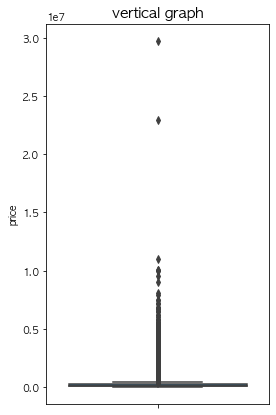

In [149]:
# boxplot 세로 그래프
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'price', data = user_monetary)
plt.title('vertical graph', size = 15)
plt.show()

**소수 유저의 구매 금액이 이상치 급으로 큰 것을 확인**

In [150]:
#4 Quantile
num = user_monetary['price']
Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
Q2 = num.quantile(.5)
Q4 = num.quantile(1)

print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('Q4: ', Q4)

Q1:  49000.0
Q2:  100499.5
Q3:  216500.0
Q4:  29726100.0


In [ ]:
# percentile
num_m = user_monetary['price']

P1 = np.percentile(num_m, 10, interpolation = 'nearest')
P2 = np.percentile(num_m, 20, interpolation = 'nearest')
P3 = np.percentile(num_m, 30, interpolation = 'nearest')
P4 = np.percentile(num_m, 40, interpolation = 'nearest')
P5 = np.percentile(num_m, 50, interpolation = 'nearest')
P6 = np.percentile(num_m, 60, interpolation = 'nearest')
P7 = np.percentile(num_m, 70, interpolation = 'nearest')
P8 = np.percentile(num_m, 80, interpolation = 'nearest')
P9 = np.percentile(num_m, 90, interpolation = 'nearest')

In [151]:
user_monetary['monetary'] = ""

In [141]:
def quantile(x):
    if x > Q3 :
        return 4
    
    elif x > Q2 :
        return 3
    
    elif x > Q1 :
        return 2
    
    else:
        return 1

In [152]:
user_monetary['monetary'] = user_monetary['price'].apply(quantile)

In [154]:
user_monetary['monetary'].value_counts(normalize = True)

1   0.26
3   0.25
4   0.25
2   0.24
Name: monetary, dtype: float64

In [ ]:
def monetary(x):
    if x > P9 :
        return 10
    
    elif x > P8 :
        return 9
    
    elif x > P7 :
        return 8
    
    elif x > P6 :
        return 7
    
    elif x > P5 :
        return 6
    
    elif x > P4 :
        return 5
    
    elif x > P3 :
        return 4
    
    elif x > P2 :
        return 3
    
    elif x > P1 :
        return 2
    else:
        return 1

In [ ]:
user_monetary['monetary'] = user_monetary['price'].apply(monetary)

In [ ]:
# #monetary 를 10분위로 점수 부여
# for i in range(0, len(user_monetary['monetary'])):
#     if user_monetary['price'][i] > P9 :
#         user_monetary['monetary'][i] = 10
#     elif user_monetary['price'][i] > P8 :
#         user_monetary['monetary'][i] = 9
#     elif user_monetary['price'][i] > P7 :
#         user_monetary['monetary'][i] = 8
#     elif user_monetary['price'][i] > P6 :
#         user_monetary['monetary'][i] = 7
#     elif user_monetary['price'][i] > P5 :
#         user_monetary['monetary'][i] = 6
#     elif user_monetary['price'][i] > P4 :
#         user_monetary['monetary'][i] = 5
#     elif user_monetary['price'][i] > P3 :
#         user_monetary['monetary'][i] = 4
#     elif user_monetary['price'][i] > P2 :
#         user_monetary['monetary'][i] = 3
#     elif user_monetary['price'][i] > P1 :
#         user_monetary['monetary'][i] = 2
#     else:
#         user_monetary['monetary'][i] = 1

In [ ]:
# #monetary 를 4분위로 점수 부여
# for i in range(1, len(user_monetary['monetary'])):
#     if user_monetary['price'][i] > Q3 :
#         user_monetary['monetary'][i] = 4
#     elif user_monetary['price'][i] > Q2:
#         user_monetary['monetary'][i] = 3
#     elif user_monetary['price'][i] > Q1:
#         user_monetary['monetary'][i] = 2
#     else:
#         user_monetary['monetary'][i] = 1

In [ ]:
user_monetary.head()

In [ ]:
# for index, row in user_sales.iterrows():
#     if row.price > Q3:
#         df.loc[index, 'monetary'] = 4
#     elif row.price > Q2:
#         df.loc[index, 'monetary'] = 3
#     elif row.price > Q1:
#         df.loc[index, 'monetary'] = 2
#     else:
#         df.loc[index, 'monetary'] = 1

In [ ]:
#점수 별 수
user_monetary['monetary'].value_counts()

## RFM 분석 - Frequency

In [155]:
#구매 빈도 구하기
#구매한 고객 user_no, session_id 가져오기
user_frequency = df[df['event_name']=='purchase_success'][['user_no', 'session_id']]

In [156]:
user_frequency.drop_duplicates(['session_id'], inplace = True)

In [157]:
user_frequency = user_frequency.groupby('user_no')['session_id'].count().reset_index()


In [158]:
#구매 빈도
user_frequency['session_id'].value_counts().sort_index()

1     96029
2     27029
3     11030
4      5546
5      2891
6      1642
7       987
8       590
9       359
10      248
11      134
12      101
13       68
14       56
15       36
16       34
17       18
18       21
19       16
20        8
21        9
22        6
23        4
24        7
25        6
26        4
27        3
29        2
30        2
31        2
32        3
33        1
34        3
35        1
38        1
40        1
41        1
42        1
54        1
69        1
90        1
99        1
Name: session_id, dtype: int64

In [159]:
user_frequency['frequency'] = ""

In [160]:
user_frequency.head()

,user_no,session_id,frequency
0,+++T9c17sr6wEYOy9UFv3w==,4,
1,+++aQH5NnhiU/9qECKk3uQ==,2,
2,++0bwiYVJ/TAsCpxI4UCuw==,1,
3,++1HN9s1imztN8ftPCt3LA==,1,
4,++2StXdzG0Bj/Kkb5EFcog==,1,


In [161]:
def frequency(x):
    if x == 1 :
        return 1
    
    elif x <= 3 :
        return 2
    
    elif x<= 7 :
        return 3
    
    else:
        return 4

In [162]:
user_frequency['frequency'] = user_frequency['session_id'].apply(frequency)

In [ ]:
# # frequency 점수 부여
# for i in range(0, len(user_frequency['frequency'])):
#     if user_frequency['session_id'][i] == 1:
#         user_frequency['frequency'][i] = 2.5
#     elif user_frequency['session_id'][i] <= 3 :
#         user_frequency['frequency'][i] = 5
#     elif user_frequency['session_id'][i] <= 7 :
#         user_frequency['frequency'][i] = 7.5
#     else:
#         user_frequency['frequency'][i] = 10

In [ ]:
# # percentile
# num_f = user_frequency['session_id']

# P1 = np.percentile(num_f, 10, interpolation = 'nearest')
# P2 = np.percentile(num_f, 20, interpolation = 'nearest')
# P3 = np.percentile(num_f, 30, interpolation = 'nearest')
# P4 = np.percentile(num_f, 40, interpolation = 'nearest')
# P5 = np.percentile(num_f, 50, interpolation = 'nearest')
# P6 = np.percentile(num_f, 60, interpolation = 'nearest')
# P7 = np.percentile(num_f, 70, interpolation = 'nearest')
# P8 = np.percentile(num_f, 80, interpolation = 'nearest')
# P9 = np.percentile(num_f, 90, interpolation = 'nearest')

In [ ]:
# #frequency 를 10분위로 점수 부여
# for i in range(1, len(user_frequency['session_id'])):
#     if user_frequency['session_id'][i] > P9 :
#         user_frequency['frequency'][i] = 10
#     elif user_frequency['session_id'][i] > P8 :
#         user_frequency['frequency'][i] = 9
#     elif user_frequency['session_id'][i] > P7 :
#         user_frequency['frequency'][i] = 8
#     elif user_frequency['session_id'][i] > P6 :
#         user_frequency['frequency'][i] = 7
#     elif user_frequency['session_id'][i] > P5 :
#         user_frequency['frequency'][i] = 6
#     elif user_frequency['session_id'][i] > P4 :
#         user_frequency['frequency'][i] = 5
#     elif user_frequency['session_id'][i] > P3 :
#         user_frequency['frequency'][i] = 4
#     elif user_frequency['session_id'][i] > P2 :
#         user_frequency['frequency'][i] = 3
#     elif user_frequency['session_id'][i] > P1 :
#         user_frequency['frequency'][i] = 2
#     else:
#         user_frequency['frequency'][i] = 1

In [ ]:
# for i in range(1, 146905):
#     if df_Frequency['Frequency_purchase'][i] == 1:
#         df_Frequency['F_Score'][i] = 1
#     elif df_Frequency['Frequency_purchase'][i] <= 3:
#         df_Frequency['F_Score'][i] = 2
#     elif df_Frequency['Frequency_purchase'][i] <= 10:
#         df_Frequency['F_Score'][i] = 3
#     else:
#         df_Frequency['F_Score'][i] = 4

In [163]:
user_frequency['frequency'].value_counts()

1    96029
2    38059
3    11066
4     1750
Name: frequency, dtype: int64

## RFM 분석 - Recency

In [164]:
user_recency = df[df['event_name']=='purchase_success'][['session_id', 'user_no', 'event_timestamp', 'event_name']]

In [165]:
user_recency

,session_id,user_no,event_timestamp,event_name
40,cddf65caad5fe0da36ceaeaf6ecc7d45,l1wFRhb3av5rTWyYEofrIA==,2021-07-22 09:06:32.310004,purchase_success
49,cddf65caad5fe0da36ceaeaf6ecc7d45,l1wFRhb3av5rTWyYEofrIA==,2021-07-22 09:06:32.312005,purchase_success
52,16e708ee91a1bd7beb297bf6bad1ddaa,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-05 16:34:41.511016,purchase_success
53,16e708ee91a1bd7beb297bf6bad1ddaa,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-05 16:34:41.511017,purchase_success
55,62f88dca0928240cc90b285198b43f73,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-10 20:26:17.230003,purchase_success
...,...,...,...,...
5880386,27f0fb7b0a61f8f92fdfd2c73f6b4c72,oh75lIfzKEJ2rFR/iJ/qdA==,2021-08-04 10:23:49.345004,purchase_success
5880391,27f0fb7b0a61f8f92fdfd2c73f6b4c72,oh75lIfzKEJ2rFR/iJ/qdA==,2021-08-04 10:23:49.346005,purchase_success
5880394,d5b03d3acb580879f82271ab4885ee5e,+LFNEeZb/856pFisEieEiQ==,2021-08-04 09:07:15.743004,purchase_success
5880402,9034aefc59c787ca83bd15648e93ad3a,8okJXtYVKYoBoBAG823v2Q==,2021-08-04 11:05:01.281062,purchase_success


In [166]:
user_recency1 = user_recency.groupby('user_no')['session_id'].count().reset_index()

In [167]:
user_recency = pd.merge(user_recency, user_recency1, how = 'inner', on = 'user_no')

In [168]:
user_recency.columns=['session_id', 'user_no', 'event_timestamp', 'event_name', 'session_count']

In [169]:
user_recency.set_index('user_no', inplace = True)

In [170]:
user_recency['event_timestamp'] = user_recency['event_timestamp'].dt.strftime('%y/%m/%d')

AttributeError: Can only use .dt accessor with datetimelike values

In [171]:
user_recency.head()

,session_id,event_timestamp,event_name,session_count
user_no,,,,
l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,2021-07-22 09:06:32.310004,purchase_success,2
l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,2021-07-22 09:06:32.312005,purchase_success,2
Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,2021-06-05 16:34:41.511016,purchase_success,8
Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,2021-06-05 16:34:41.511017,purchase_success,8
Y5GM63HPuFwrRnvYhDu7sQ==,62f88dca0928240cc90b285198b43f73,2021-06-10 20:26:17.230003,purchase_success,8


In [172]:
user_recency = user_recency.groupby('user_no')['event_timestamp'].max().reset_index()

In [173]:
user_recency

,user_no,event_timestamp
0,+++T9c17sr6wEYOy9UFv3w==,2021-07-03 17:51:26.43805
1,+++aQH5NnhiU/9qECKk3uQ==,2021-06-21 20:56:44.832066
2,++0bwiYVJ/TAsCpxI4UCuw==,2021-07-27 14:33:20.527011
3,++1HN9s1imztN8ftPCt3LA==,2021-06-10 09:24:07.981038
4,++2StXdzG0Bj/Kkb5EFcog==,2021-06-29 18:49:40.928022
...,...,...
146899,zzrBh62TO71nt1GQm+jMjA==,2021-07-27 22:25:33.347005
146900,zzuJMnncH5Wrn/GUA7nqTg==,2021-07-23 20:01:48.630025
146901,zzwYai1YDr0JZQwaTqc0mQ==,2021-07-04 20:40:01.110004
146902,zzwxh/ZL9TPJOWZHLMvnDQ==,2021-06-30 16:21:08.063009


In [174]:
# user_recency = pd.merge(user1, user_recency, how = 'inner', on = 'user_no')

In [175]:
# user_recency

In [176]:
# user_recency.columns = ['user_no', 'session_id', 'event_timestamp', 'event_name', 'session_count', 'event_max']

In [177]:
user_recency['recency'] = ""

In [178]:
user_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146904 entries, 0 to 146903
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_no          146904 non-null  object
 1   event_timestamp  146904 non-null  object
 2   recency          146904 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


In [179]:
#일자 표시 변환
user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True).dt.strftime('%y/%m/%d')


#datetime 변환
user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True)



In [186]:
# #일자 표시 변환
# user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True).dt.strftime('%y/%m/%d')
# user_recency['event_max'] = pd.to_datetime(user_recency['event_max'], yearfirst = True).dt.strftime('%y/%m/%d')

# #datetime 변환
# user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True)
# user_recency['event_max'] = pd.to_datetime(user_recency['event_max'], yearfirst = True)


In [ ]:
# user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'])
# user_recency['event_max'] = pd.to_datetime(user_recency['event_max'])

In [180]:
user_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146904 entries, 0 to 146903
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   user_no          146904 non-null  object        
 1   event_timestamp  146904 non-null  datetime64[ns]
 2   recency          146904 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.4+ MB


In [182]:
# 비교 날짜
date_compare = pd.datetime.strptime("20210804", "%Y%m%d")
user_recency['date_compare'] = date_compare
user_recency['recency'] = (date_compare - user_recency['event_timestamp'])

In [183]:
#timedelta 를 int로
user_recency['recency'] = user_recency['recency'].dt.days

In [184]:
#필요없는 컬럼 날리기
user_recency.drop(columns = ['date_compare'], inplace = True)
user_recency.head()

,user_no,event_timestamp,recency
0,+++T9c17sr6wEYOy9UFv3w==,2021-07-03,32
1,+++aQH5NnhiU/9qECKk3uQ==,2021-06-21,44
2,++0bwiYVJ/TAsCpxI4UCuw==,2021-07-27,8
3,++1HN9s1imztN8ftPCt3LA==,2021-06-10,55
4,++2StXdzG0Bj/Kkb5EFcog==,2021-06-29,36


In [185]:
user_recency

,user_no,event_timestamp,recency
0,+++T9c17sr6wEYOy9UFv3w==,2021-07-03,32
1,+++aQH5NnhiU/9qECKk3uQ==,2021-06-21,44
2,++0bwiYVJ/TAsCpxI4UCuw==,2021-07-27,8
3,++1HN9s1imztN8ftPCt3LA==,2021-06-10,55
4,++2StXdzG0Bj/Kkb5EFcog==,2021-06-29,36
...,...,...,...
146899,zzrBh62TO71nt1GQm+jMjA==,2021-07-27,8
146900,zzuJMnncH5Wrn/GUA7nqTg==,2021-07-23,12
146901,zzwYai1YDr0JZQwaTqc0mQ==,2021-07-04,31
146902,zzwxh/ZL9TPJOWZHLMvnDQ==,2021-06-30,35


In [187]:
#4 Quantile
num = user_recency['recency']
Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
Q2 = num.quantile(.5)
Q4 = num.quantile(1)

print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('Q4: ', Q4)

Q1:  13.0
Q2:  26.0
Q3:  41.0
Q4:  62.0


In [ ]:
# percentile
num_r = user_recency['recency']

P1 = np.percentile(num_r, 10, interpolation = 'nearest')
P2 = np.percentile(num_r, 20, interpolation = 'nearest')
P3 = np.percentile(num_r, 30, interpolation = 'nearest')
P4 = np.percentile(num_r, 40, interpolation = 'nearest')
P5 = np.percentile(num_r, 50, interpolation = 'nearest')
P6 = np.percentile(num_r, 60, interpolation = 'nearest')
P7 = np.percentile(num_r, 70, interpolation = 'nearest')
P8 = np.percentile(num_r, 80, interpolation = 'nearest')
P9 = np.percentile(num_r, 90, interpolation = 'nearest')

In [188]:
user_recency['recency_score'] = ""

In [ ]:
def recency2(x):
    if x < P1 :
        return 10
    
    elif x < P2 :
        return 9
    
    elif x < P3 :
        return 8
    
    elif x < P4 :
        return 7
    
    elif x < P5 :
        return 6
    
    elif x < P6 :
        return 5
    
    elif x < P7 :
        return 4
    
    elif x < P8 :
        return 3
    
    elif x < P9 :
        return 2
    else:
        return 1

In [ ]:
def recency(x):
    if x > P9 :
        return 1
    
    elif x > P8 :
        return 2
    
    elif x > P7 :
        return 3
    
    elif x > P6 :
        return 4
    
    elif x > P5 :
        return 5
    
    elif x > P4 :
        return 6
    
    elif x > P3 :
        return 7
    
    elif x > P2 :
        return 8
    
    elif x > P1 :
        return 9
    else:
        return 10

In [ ]:
user_recency['recency_score'] = user_recency['recency'].apply(recency2)

In [ ]:
# #recency 를 10분위로 점수 부여
# for i in range(0, len(user_recency['recency'])):
#     if user_recency['recency'][i] > P9 :
#         user_recency['recency_score'][i] = 1
#     elif user_recency['recency'][i] > P8 :
#         user_recency['recency_score'][i] = 2
#     elif user_recency['recency'][i] > P7 :
#         user_recency['recency_score'][i] = 3
#     elif user_recency['recency'][i] > P6 :
#         user_recency['recency_score'][i] = 4
#     elif user_recency['recency'][i] > P5 :
#         user_recency['recency_score'][i] = 5
#     elif user_recency['recency'][i] > P4 :
#         user_recency['recency_score'][i] = 6
#     elif user_recency['recency'][i] > P3 :
#         user_recency['recency_score'][i] = 7
#     elif user_recency['recency'][i] > P2 :
#         user_recency['recency_score'][i] = 8
#     elif user_recency['recency'][i] > P1 :
#         user_recency['recency_score'][i] = 9
#     else:
#         user_recency['recency_score'][i] = 10

In [193]:
def recency(x):
    if x > Q3 :
        return 1
    elif x > Q2 :
        return 2
    elif x > Q1 :
        return 3
    else :
        return 4

In [194]:
user_recency['recency_score'] = user_recency['recency'].apply(recency)

In [ ]:
#recency 를 4분위로 점수 부여
user_recency['recency_score'] = ""

for i in range(1, len(user_recency['recency'])):
    if user_recency['recency'][i] > Q3 :
        user_recency['recency_score'][i] = 1
    elif user_recency['recency'][i] > Q2 :
        user_recency['recency_score'][i] = 2
    elif user_recency['recency'][i] > Q1 :
        user_recency['recency_score'][i] = 3
    else :
        user_recency['recency_score'][i] = 4

In [195]:
user_recency['recency_score'].value_counts()

4    37909
2    36605
1    36268
3    36122
Name: recency_score, dtype: int64

## RFM 합산


In [ ]:
# user_monetary, user_frequency, user_recency

In [ ]:
user_monetary['monetary']

In [ ]:
user_frequency['frequency']

In [ ]:
user_recency['recency_score']

In [197]:
#RFM 을 위한 데이터 통합
from functools import reduce

dfs = [user_monetary, user_frequency, user_recency]
RFM = reduce(lambda left, right: pd.merge(left, right, on='user_no'), dfs)


In [198]:
RFM = RFM[['user_no', 'monetary','frequency', 'recency_score']].drop_duplicates()

In [104]:
RFM = pd.read_csv('/Users/greedy/Downloads/프로그래밍/FastCampus_29cm_FinalProject/RFM.csv')

In [199]:
RFM.drop(columns = 'Unnamed: 0', inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

### RFM 기준 고객 세그먼트

if [RFM | Recency Score] >= 9 and ([RFM | Frequency Score]*2.5) >= 9 and [RFM | Monetary Score] >= 9 then 'VVIP 고객'

elseif [RFM | Recency Score] >= 6 and ([RFM | Frequency Score]*2.5) >= 6 and [RFM | Monetary Score] >= 7 then 'VIP 고객'

elseif [RFM | Recency Score] <= 3 and ([RFM | Frequency Score]*2.5) >= 7 and [RFM | Monetary Score] >= 7 then '놓치면 안 될 고객'

elseif [RFM | Recency Score] <= 3 and ([RFM | Frequency Score]*2.5) >= 6 and [RFM | Monetary Score] >= 5 then '이탈 우려 고객'

elseif [RFM | Recency Score] >= 7 and ([RFM | Frequency Score]*2.5) <= 4 and [RFM | Monetary Score] >= 5 then '우량 가망 신규 고객'

elseif [RFM | Recency Score] <= 3 and ([RFM | Frequency Score]*2.5) <= 3 and [RFM | Monetary Score] <= 3 then '저수익성 고객'

elseif [RFM | Recency Score] >= 5 and ([RFM | Frequency Score]*2.5) >= 5 and [RFM | Monetary Score] >= 5 then '우수 일반 고객'

else '일반 고객'
END

In [203]:
# 파일화
RFM.to_csv('RFM.csv')

In [200]:
RFM[['monetary', 'recency_score', 'frequency']] = RFM[['monetary', 'recency_score', 'frequency']].apply(pd.to_numeric, errors = 'coerce')

In [201]:
RFM['segment'] = ""

In [202]:
RFM

,user_no,monetary,frequency,recency_score,segment
0,+++T9c17sr6wEYOy9UFv3w==,4,3,2,
1,+++aQH5NnhiU/9qECKk3uQ==,3,2,1,
2,++0bwiYVJ/TAsCpxI4UCuw==,2,1,4,
3,++1HN9s1imztN8ftPCt3LA==,1,1,1,
4,++2StXdzG0Bj/Kkb5EFcog==,1,1,2,
...,...,...,...,...,...
146899,zzrBh62TO71nt1GQm+jMjA==,3,1,4,
146900,zzuJMnncH5Wrn/GUA7nqTg==,2,1,4,
146901,zzwYai1YDr0JZQwaTqc0mQ==,2,1,2,
146902,zzwxh/ZL9TPJOWZHLMvnDQ==,3,1,2,


In [108]:
# def RFM_func(RFM):
#     if ((RFM['recency_score'] >= 9) & (RFM['frequency'] >= 9) & (RFM['monetary'] >= 9)):
#         return 'VVIP 고객'
#     elif (RFM['recency_score'] >= 6) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 7):
#         return 'VIP 고객'
#     elif (RFM['recency_score'] <= 3) & (RFM['frequency'] >= 7) & (RFM['monetary'] >= 7):
#         return '놓치면 안 될 고객'
#     elif (RFM['recency_score'] <= 3) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 5):
#         return '이탈 우려 고객'
#     elif (RFM['recency_score'] >= 7) & (RFM['frequency'] <= 4) & (RFM['monetary'] >= 5):
#         return '우량 가망 신규 고객'
#     elif (RFM['recency_score'] <= 3) & (RFM['frequency'] <= 3) & (RFM['monetary'] <= 3):
#         return '저수익성 고객'
#     elif (RFM['recency_score'] >= 5) & (RFM['frequency'] >= 5) & (RFM['monetary'] >= 5):
#         return '우수 일반 고객'
#     else :
#         return '일반 고객'

In [110]:
RFM.loc[:,'segment'] = '일반 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] <= 3) & (RFM['monetary'] <= 3), 'segment'] = '저수익성 고객'
RFM.loc[(RFM['recency_score'] >= 7) & (RFM['frequency'] <= 4) & (RFM['monetary'] >= 5), 'segment'] = '우량 가망 신규 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 5), 'segment'] = '이탈 우려 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] >= 7) & (RFM['monetary'] >= 7), 'segment'] = '놓치면 안 될 고객' 
RFM.loc[(RFM['recency_score'] >= 5) & (RFM['frequency'] >= 5) & (RFM['monetary'] >= 5), 'segment'] = '우수 일반 고객'
RFM.loc[(RFM['recency_score'] >= 6) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 7), 'segment'] = 'VIP 고객'
RFM.loc[(RFM['recency_score'] >= 9) & (RFM['frequency'] >= 9) & (RFM['monetary'] >= 9), 'segment'] = 'VVIP 고객'

In [138]:
RFM.loc[:,'segment'] = '일반 고객'
RFM.loc[(RFM['recency_score'] <= 3) & (RFM['frequency'] <= 3) & (RFM['monetary'] <= 3), 'segment'] = '저수익성 고객'
RFM.loc[(RFM['recency_score'] >= 7) & (RFM['frequency'] <= 4) & (RFM['monetary'] >= 5), 'segment'] = '우량 가망 신규 고객' 
RFM.loc[(RFM['recency_score'] >= 5) & (RFM['frequency'] >= 5) & (RFM['monetary'] >= 5), 'segment'] = '우수 일반 고객'
RFM.loc[(RFM['recency_score'] >= 6) & (RFM['frequency'] >= 6) & (RFM['monetary'] >= 7), 'segment'] = 'VIP 고객'

In [139]:
RFM['segment'].value_counts(normalize=True)

일반 고객         0.56
우수 일반 고객      0.18
저수익성 고객       0.11
우량 가망 신규 고객   0.08
VIP 고객        0.07
Name: segment, dtype: float64

In [133]:
RFM['segment'].value_counts()

일반 고객          81520
우수 일반 고객       25769
저수익성 고객        16037
우량 가망 신규 고객    12276
VIP 고객          9637
VVIP 고객         1224
놓치면 안 될 고객       427
이탈 우려 고객          14
Name: segment, dtype: int64

In [132]:
RFM.drop(columns = 'Unnamed: 0')

,user_no,monetary,frequency,recency_score,segment
0,+++T9c17sr6wEYOy9UFv3w==,9,7.50,4,일반 고객
1,+++aQH5NnhiU/9qECKk3uQ==,7,5.00,3,일반 고객
2,++0bwiYVJ/TAsCpxI4UCuw==,5,2.50,9,우량 가망 신규 고객
3,++1HN9s1imztN8ftPCt3LA==,1,2.50,1,저수익성 고객
4,++2StXdzG0Bj/Kkb5EFcog==,1,2.50,4,일반 고객
...,...,...,...,...,...
146899,zzrBh62TO71nt1GQm+jMjA==,8,2.50,9,우량 가망 신규 고객
146900,zzuJMnncH5Wrn/GUA7nqTg==,4,2.50,8,일반 고객
146901,zzwYai1YDr0JZQwaTqc0mQ==,3,2.50,5,일반 고객
146902,zzwxh/ZL9TPJOWZHLMvnDQ==,8,2.50,4,일반 고객


## 구매 전환율

In [ ]:
#event에서 purchase 의 비율

def cvr(pop) :
    #pop은 원하는 df
    sample = pop[pop['event_name']=='purchase_success']
    if len(pop) == 0 :
        print(pop, '의 숫자가 0입니다.')
    else :
        print( "%0.2f%%" % (len(sample)/len(pop)*100))
    return (len(sample)/len(pop)*100)

In [ ]:
cvr(F)

In [ ]:
# 성별 
F = df[df['gender']=='F']
print('여성 : '), cvr(F)

M = df[df['gender']=='M']
print('남성 : '), cvr(M)

print('전체 : '), cvr(df)

# None

In [ ]:
#카테고리 별
def cvr_col(col):
    #col은 컬럼
    arr1 = df['col'].unique()
    for i in arr1:
        print(i, ':')
        i = df[df['col']==i]
        cvr(i), print('\n')
        return cvr(i)

In [ ]:
df['category1_name'].unique()

In [ ]:
for i in df['category1_name'].unique():
    print(i, ':')
    i = df[df['category1_name']==i]
    cvr(i), print('\n')

In [134]:
RFM['recency_score'].value_counts()

7     16641
5     15949
2     15212
1     15177
3     14379
4     14249
6     14193
9     13881
10    13774
8     13449
Name: recency_score, dtype: int64

In [135]:
RFM['monetary'].value_counts()

2     16647
1     14895
6     14888
8     14723
10    14689
9     14653
7     14486
4     14445
5     13766
3     13712
Name: monetary, dtype: int64

In [137]:
RFM['frequency'].value_counts(normalize = True)

2.50    0.65
5.00    0.26
7.50    0.08
10.00   0.01
Name: frequency, dtype: float64